<a href="https://colab.research.google.com/github/JuanBalde/Juan-y-Patricio-Facultad/blob/main/TP_3_N2_Vizcocidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install latex
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install texlive-latex-extra texlive-fonts-recommended
!apt install texlive-fonts-extra cm-super dvipng
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash



  Using cached latex-0.7.0-py3-none-any.whl
  Using cached tempdir-0.7.1.tar.gz (5.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached data-0.4-py3-none-any.whl
  Using cached shutilwhich-1.1.0-py3-none-any.whl
  Using cached funcsigs-1.0.2-py2.py3-none-any.whl (17 kB)
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2196 sha256=946169c51e160e08caa9f16f6e612b5f7c11135e67aba83b801e6eea4876c4f6
  Stored in directory: /root/.cache/pip/wheels/c6/9a/9d/44903aa5aac6c6bc5f0c331ed86214bbedce17e8556d002f1a
Successfully built tempdir
E: Could not get lock /var/lib/dpkg/lock-frontend. It is held by process 514 (apt)
N: Be aware that removing the lock file is not a solution and may break your system.
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), is another process using it?
E: Could not get lock /var/lib/dpkg/lock-frontend. It is held by process 514 (apt)
N: Be aware that removing the lock file is not a solution and may break your sys

# Cuentas para el TP 3 - Viscocidad


## Antes de empezar hay que hacer cuentas.

El numero de Reynolds debe ser menor a 2100.

$Re=\frac{2G\rho}{\pi R\eta}$

$G=\frac{\pi R^4 \Delta P}{8 \eta L}$

$\Delta P=\rho m g\Delta h$

In [ ]:
!apt install --yes --force-yes texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import statsmodels.api as sm



#import matplotlib
from matplotlib import rc

%matplotlib inline
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
#matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


^C


KeyboardInterrupt: 

In [ ]:
def Plot_CI(X:list,CI_lower:list,CI_upper:list,Color='gray',Transparencia=0.4,Label=''):
    #plt.plot(X,CI_upper,color=Color)
    #plt.plot(X,CI_lower,color=Color)
    plt.fill_between(
        x=X,
        y1=CI_lower,
        y2=CI_upper,
        color=Color,
        alpha=Transparencia,
        label=Label
    )

In [ ]:
Kb = 1.380649e-23 #J/K
PmN2= (2*14)/1000/6.02e23 #Kg/atomo

T = 21.25 + 273 # Kelvin
err_T = 0.25    # Kelvin

L = (15 + 8.8)/100 #cm a m Longitud del tubo
err_L = (0.01)/100


R = (0.697*10**-5) * 1e-8 # cm4 to m4 Estos dos son los parametros del tubo, su radio y longitud
err_R=(1e-5)*(1e-8) #la ultima cifra significativa

Denm = (0.99798 * 1000) # g/cm3 a kg/m3 Densidad del fluido en el manometro

g = 9.80665 #  m.s-2 Velocidad de la gravedad

pi = np.pi

# a) Se grafica G vs Δp (o Δh) y se obtiene el valor del coeficiente de viscosidad del gas por cuadrados mínimos, con su respectivo error. (Ecuación 6)

$𝐺=\frac{𝜋𝑅^4𝛥𝑝}{8𝜂𝐿}$

El coerficiente de vizcocidad es el $\eta$

In [ ]:
# Valores medidos del N2
dh = np.array(
    [19.8 - 3.0,
     16.8 - 5.9,
     14.1 - 8.6,
     13.3 - 9.4,
     12.8 - 9.9,
     12.6 - 10.2,
     21.0 - 1.9]
)/100 # de cm a m Diferencia de alturas

dh = abs(dh)
err_dh = np.array([0.02/100]*len(dh))

V_burb = 10 *1e-6 #mL a L
err_V_burb = 0.1*1e-6 # +/- 0.1mL a L

seg = ([1.03, 1.06, 1.10, 1.07, 1.06, 1.10],
       [1.59, 1.72, 1.85, 1.91, 2.00, 2.09],
       [3.15, 3.25, 3.13, 3.22, 3.32, 3.35],
       [4.28, 4.35, 4.28, 4.29, 4.37, 4.32],
       [5.75, 5.84, 5.94, 5.88, 5.88, 5.90],
       [6.87, 7.00, 7.10, 7.04, 7.00, 7.00],
       [0.82, 0.81, 0.84, 0.78, 0.82, 0.88]
)    # seg

t = []
err_t=[]
for i in seg:
    t.append(np.mean(i))
    err_t.append(np.std(i))
t = np.array(t)
err_t = np.array(err_t)


Los parametros del ajuste son [5.44613714e-09 1.02814694e-07]


El coeficiente de viscocidad es 2.111675269047448e-05 +/- 9e-09  Pa.s 
El coeficiente de viscocidad es 0.02111675269047448 +/- 9e-06  cP 



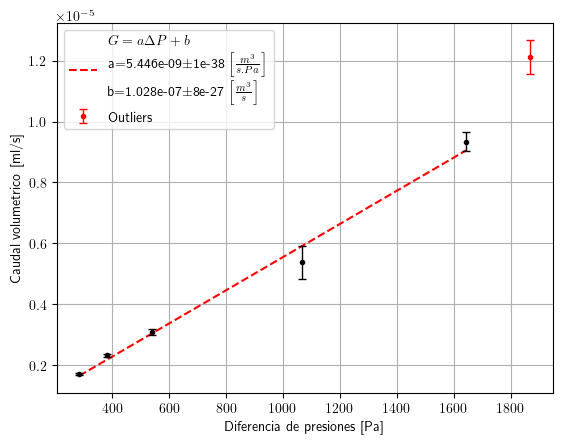

In [ ]:
G = V_burb/t
err_G = abs(1/t)*err_V_burb + abs(-G/t)*err_t


dp = dh*g*Denm
err_dp = np.array([0]*len(dp)) #Pa



def Ajuste(x,m,b):
  A = m*x + b
  return(A)

Parametros,paramcovarp = curve_fit(Ajuste, dp[:5], G[:5])#,sigma = err_G[:5],absolute_sigma = True) # podemos graficar con dp o con dh
err_Parametros = np.diagonal(paramcovarp)**2

y_pred = Ajuste(dp, *Parametros)
R2=r2_score(G, y_pred)

print(f"\nLos parametros del ajuste son {Parametros}")

pend = Parametros[0]
err_pend = err_Parametros[0]
eta = pi*R/(8*pend*L)
err_eta = abs(4*pi*R**3/(8*L*pend))*err_R
err_eta += abs(eta/L)*err_L
err_eta += abs(eta/pend)*err_pend

print(f"\n\nEl coeficiente de viscocidad es {eta} +/- {err_eta:.1g}  Pa.s ")
print(f"El coeficiente de viscocidad es {eta*1000} +/- {err_eta*1000:.1g}  cP \n")
print(14.945*1000)
################################################################################
################################################################################

plt.errorbar(dp[:5], G[:5], fmt='k.',yerr=err_G[:5],elinewidth=1,capsize=3,zorder=20)   # Saque el ultimo punto
plt.errorbar(dp[-1],G[-1],fmt='r.',yerr=err_G[-1],label='Outliers',elinewidth=1,capsize=3)


x = np.linspace(min(dp[:5]), max(dp[:5]), 100)
etiqueta_ajuste="asd"
etiqueta_ajuste = f"$G=a\Delta P+b$\n a={pend:.3e}$\pm${err_pend:.1g}"
etiqueta_ajuste += r"  $\left[\frac{m^3}{s.Pa}\right]$"+f"\n b={Parametros[1]:.3e}$\pm${err_Parametros[1]:.1g} "+ r"$\left[\frac{m^3}{s}\right]$"
#etiqueta_ajuste += f"\n R^2 = {R2:.4f}"

plt.plot(x, Ajuste(x, *Parametros), 'r--',label=etiqueta_ajuste)


#plt.title("Grafico del caudal volumetrico en funcion de la diferencia de presiones medida")
plt.xlabel("Diferencia de presiones [Pa]")
plt.ylabel("Caudal volumetrico [ml/s]")  #no olvidarse de cambiar unidades correspondientemente
plt.grid()
plt.legend(loc='upper left')
#plt.savefig('ajuste_g_dP_N2.png',dpi=300,bbox_inches='tight')



El coeficiente de viscocidad es 1.8807496817447284e-05 +/- 1e-06  Pa.s 
El coeficiente de viscocidad es 0.018807496817447283 +/- 0.001  cP 



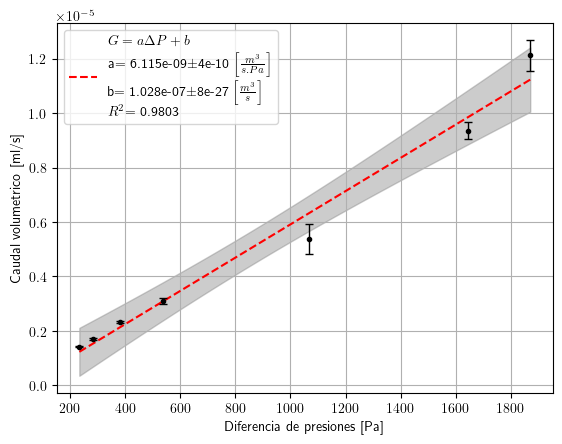

In [ ]:
G = V_burb/t
err_G = abs(1/t)*err_V_burb + abs(-G/t)*err_t


dp = dh*g*Denm
err_dp = np.array([0]*len(dp)) #Pa

x = dp
y = G
ajuste= sm.OLS(y,sm.add_constant(x)).fit()
ord,pend= ajuste.params
err_ord, err_pend= ajuste.bse
R2=ajuste.rsquared

x_ci = np.linspace(min(x),max(x),50)
frame = ajuste.get_prediction(sm.add_constant(x_ci)).summary_frame(alpha=0.05)
ci_low = frame.mean_ci_lower
ci_up = frame.mean_ci_upper


eta = pi*R/(8*pend*L)
err_eta = abs(4*pi*R**3/(8*L*pend))*err_R
err_eta += abs(eta/L)*err_L
err_eta += abs(eta/pend)*err_pend

print(f"\n\nEl coeficiente de viscocidad es {eta} +/- {err_eta:.1g}  Pa.s ")
print(f"El coeficiente de viscocidad es {eta*1000} +/- {err_eta*1000:.1g}  cP \n")
################################################################################
################################################################################

plt.errorbar(x, y, fmt='k.',yerr=err_G,elinewidth=1,capsize=3,zorder=20)

x = np.linspace(min(x), max(x), 100)
etiqueta_ajuste = f"$G=a\Delta P+b$\n a= {pend:.3e}$\pm${err_pend:.1g}"
etiqueta_ajuste += r"  $\left[\frac{m^3}{s.Pa}\right]$"+f"\n b= {Parametros[1]:.3e}$\pm${err_Parametros[1]:.1g} "+ r"$\left[\frac{m^3}{s}\right]$"
etiqueta_ajuste += f"\n $R^2$= {R2:.4f}"

plt.plot(x, x*pend+ord, 'r--',label=etiqueta_ajuste)
Plot_CI(X=x_ci,CI_lower=ci_low,CI_upper=ci_up)

#plt.title("Grafico del caudal volumetrico en funcion de la diferencia de presiones medida")
plt.xlabel("Diferencia de presiones [Pa]")
plt.ylabel("Caudal volumetrico [ml/s]")  #no olvidarse de cambiar unidades correspondientemente
plt.grid()
plt.legend(loc='upper left')
plt.savefig('ajuste_g_dP_N2.png',dpi=300,bbox_inches='tight')

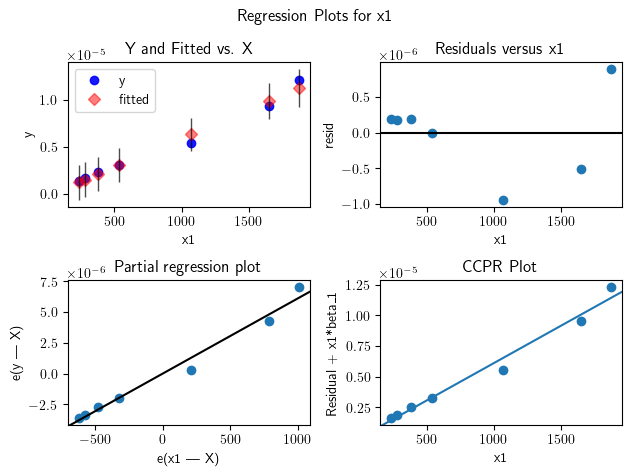

In [ ]:
fig = sm.graphics.plot_regress_exog(ajuste,'x1')
fig.tight_layout(pad=1.0)

## b) Utilizando la expresión (3) se calcula el diámetro de colisión ($\sigma$) para cada molécula.

### $\eta = \frac{1}{3}\lambda cmn = \frac{2\sqrt{mk_bT}}{3\sqrt{\pi^3}  \sigma^2} \longrightarrow \sigma=\sqrt{\frac{2\sqrt{m k T}}{3 \sqrt{\pi^3}  \eta }}$



In [ ]:
m = PmN2 # Masa molecular del gas
p = 101325  # Persion exterior en Pa
err_p=0


dp_medio = np.mean(dp)
err_dp_medio = np.std(dp)

P = p + dp_medio/2
err_P = err_p+err_dp_medio/2

n = P/(Kb*T) #densidad numerica gas
err_n = abs(1/(Kb*T))*err_P

sigma = np.sqrt(2*np.sqrt(m*Kb*T)/(3*np.sqrt(pi**3)*eta))
err_sigma = abs(np.sqrt(np.sqrt(Kb*PmN2*T)/eta)/(2*np.sqrt(6)*pi**(3/4)*T))*err_T + abs(np.sqrt(np.sqrt(Kb*PmN2*T)/eta)/(np.sqrt(6)*pi**(3/4)*eta))*err_eta

convertir_sigma=(1e10) #m^5/2 a Arnstromg^5/2

print(f"sigma= {sigma:4g}\t $\\pm$\t {err_sigma:.2g} m")
print(f"sigma= {sigma*convertir_sigma:.3F}\t $\\pm$\t {err_sigma*convertir_sigma:.1g} Armstrong")

sigma= 2.78819e-10	 $\pm$	 6.6e-12 m
sigma= 2.788	 $\pm$	 0.07 Armstrong


In [ ]:
v_medio_gas = np.sqrt(8*Kb*T/(np.pi*PmN2))
print(v_medio_gas,'m/s')

471.6166881547411 m/s


# c) Considerando al gas dentro del capilar a la presión exterior p + Δp/2, se obtendrá el camino libre medio a la temperatura de trabajo para ambos gases.

Camino libre medio es $\lambda=\frac{1}{\sqrt{2}\pi n \sigma^2}$

In [ ]:
la = 1/(np.sqrt(2)*pi*n*sigma**2)
err_la = abs(la/n)*err_n + abs(-2*la/sigma)*err_sigma
print(f"El camino libre medio es {la:.3g}  +/- {err_la:.1G} m")
print(f"El camino libre medio es {la*((1e9)):.3g}  +/- {err_la*((1e9)):.1G} nm")
print(f"El camino libre medio es {la*((1e10)):.3g}  +/- {err_la*((1e10)):.1G} A")

#aprox 100nm

El camino libre medio es 1.16e-07  +/- 6E-09 m
El camino libre medio es 116  +/- 6 nm
El camino libre medio es 1.16e+03  +/- 6E+01 A
